In [1]:
import ee
import geemap
import pandas as pd
import numpy as np
from geemap import ml
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import ensemble
from sklearn.metrics import mean_squared_error
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"D:\MTP\Project\Full_data.csv")
df.describe()

,DEPTH,LATITUDE,LONGITUDE,SALINITY,TEMPERATURE,CPHL,Oa01_radiance,Oa02_radiance,Oa03_radiance,Oa04_radiance,...,Oa12_radiance,Oa13_radiance,Oa14_radiance,Oa15_radiance,Oa16_radiance,Oa17_radiance,Oa18_radiance,Oa19_radiance,Oa20_radiance,Oa21_radiance
count,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,6.460000e+02,646.000000,646.000000,646.000000,...,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000
mean,2.684786,10.461361,-3.121178,33.541130,22.636467,5.141630,1.610683e+05,1.627106,1.503816,1.324144,...,0.387463,0.270362,0.226076,0.202088,0.246525,0.207191,0.205474,0.163363,0.071566,0.066238
std,3.777778,29.464631,73.609424,6.263416,8.017222,15.248551,4.884539e+05,0.859736,0.868608,0.904638,...,0.442925,0.356090,0.327896,0.260764,0.290378,0.242752,0.248200,0.206701,0.101411,0.091473
min,0.000199,-21.568310,-158.990000,6.556000,0.434000,0.000000,0.000000e+00,0.361457,0.352295,0.299515,...,0.032398,0.007497,0.008651,0.010536,0.018559,0.009860,0.010999,0.005028,0.001632,0.003241
25%,0.000249,-19.050987,-27.225407,33.586252,21.053001,0.079250,1.004148e+00,1.124533,0.985515,0.760307,...,0.100794,0.052478,0.047582,0.044776,0.055678,0.044370,0.038497,0.030171,0.009791,0.009724
50%,0.000428,2.568500,-24.249015,35.816502,25.924501,0.131000,1.509709e+00,1.378892,1.233032,1.019502,...,0.208788,0.125572,0.099489,0.098771,0.132567,0.108461,0.104493,0.077941,0.029374,0.029171
75%,5.340494,30.123250,69.092678,37.108002,28.481001,0.716500,2.924793e+04,1.860835,1.711364,1.506214,...,0.481473,0.306433,0.275757,0.256805,0.315509,0.261292,0.263982,0.201767,0.084858,0.083460
max,26.752193,58.872000,91.503000,37.607002,31.066001,79.000000,1.988859e+06,6.184933,5.958643,5.742620,...,2.426265,2.020398,2.145498,1.643550,1.638525,1.232510,1.308910,1.116320,0.610327,0.508865


In [3]:
features = ['Oa01_radiance', 'Oa02_radiance', 'Oa03_radiance', 'Oa04_radiance', 'Oa05_radiance', 'Oa06_radiance',
            'Oa07_radiance', 'Oa08_radiance', 'Oa09_radiance', 'Oa10_radiance', 'Oa11_radiance', 'Oa12_radiance',
            'Oa13_radiance', 'Oa14_radiance', 'Oa15_radiance', 'Oa16_radiance', 'Oa17_radiance', 'Oa18_radiance',
            'Oa19_radiance', 'Oa20_radiance', 'Oa21_radiance']
X = df[features]
target = 'CPHL'
y = df[target]



In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
n_trees = 100
rf = ensemble.RandomForestRegressor(n_trees, max_depth = 10)
rf.fit(X_train, y_train)


RandomForestRegressor(max_depth=10)

In [5]:
y_pred = rf.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
slope, intercept, r_value, p_value, std_err = stats.linregress(y_test, y_pred)

print('RMSE: ', rmse)
print('p-value: ', p_value)
print('r: ', r_value)

y_line = 1*y_test + 0

NameError: name 'rf' is not defined

In [ ]:
# Load the new data into a DataFrame (replace 'new_data.csv' with your file path)
new_data = pd.read_csv(r"D:\ACADMIA\Project\Project_alpha\bob_image_data.csv")



In [10]:
# Preprocess the new data: select the same features as in the training data
X_new = new_data[feature_names]

# # Make predictions using the trained model
predictions = rf.predict(X_new)
# np.save(r"D:\ACADMIA\Project\Project_alpha\SALINITY.npy",predictions)

# # Print the predicted values
print(predictions)


NameError: name 'new_data' is not defined

In [6]:
import numpy as np

# Load the new data as a NumPy array (replace 'new_data.npy' with your file path)
new_data = np.load(r"D:\MTP\Project\Project_alpha\BOB_cropped_data\MODIS\bob_image_data.npy")
print(new_data[1:,])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [4]:
columns=['sur_refl_b08', 'sur_refl_b09', 'sur_refl_b10', 'sur_refl_b11', 'sur_refl_b12', 'sur_refl_b13', 'sur_refl_b14', 'sur_refl_b15', 'sur_refl_b16']
dff = pd.DataFrame(new_data, columns=columns)
print(dff.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27698604 entries, 0 to 27698603
Data columns (total 9 columns):
 #   Column        Dtype  
---  ------        -----  
 0   sur_refl_b08  float64
 1   sur_refl_b09  float64
 2   sur_refl_b10  float64
 3   sur_refl_b11  float64
 4   sur_refl_b12  float64
 5   sur_refl_b13  float64
 6   sur_refl_b14  float64
 7   sur_refl_b15  float64
 8   sur_refl_b16  float64
dtypes: float64(9)
memory usage: 1.9 GB
None


In [17]:
dff.describe()

,sur_refl_b08,sur_refl_b09,sur_refl_b10,sur_refl_b11,sur_refl_b12,sur_refl_b13,sur_refl_b14,sur_refl_b15,sur_refl_b16
count,2.769860e+07,2.769860e+07,2.769860e+07,2.769860e+07,2.769860e+07,2.769860e+07,2.769860e+07,2.769860e+07,2.769860e+07
mean,3.893427e-02,2.757197e-02,1.598865e-02,9.723353e-03,4.795226e-03,-5.146497e-04,-1.051771e-06,-2.353174e-04,-1.202530e-04
std,9.864094e-02,6.756322e-02,4.277845e-02,3.184834e-02,2.180679e-02,9.268527e-03,1.029981e-02,9.840601e-03,9.638620e-03
min,-1.000000e-02,-1.000000e-02,-1.000000e-02,-1.000000e-02,-1.000000e-02,-1.000000e-02,-1.000000e-02,-1.000000e-02,-1.000000e-02
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2.080000e-02,1.580000e-02,8.500000e-03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.600000e+00,1.600000e+00,1.600000e+00,2.019000e-01,1.544000e-01,8.500000e-02,8.830000e-02,8.380000e-02,7.960000e-02


In [5]:
# Preprocess the new data: select the same features as in the training data
X_new = dff[['sur_refl_b08', 'sur_refl_b12',  'sur_refl_b09',  'sur_refl_b11',  'sur_refl_b10',  'sur_refl_b16']]

In [6]:
# Make predictions using the trained model
predictions = rf.predict(X_new)



NameError: name 'rf' is not defined

In [21]:
np.save(r"D:\ACADMIA\Project\Project_alpha\SALINITY.npy",predictions)

# Print the predicted values
print(predictions) 

[32.16283422 32.16283422 32.16283422 ... 32.16283422 32.16283422
 32.16283422]


In [22]:
print(predictions.shape)

(27698604,)


In [23]:
data=np.reshape(predictions,(4398,6298))

In [24]:
print(data.shape) 

(4398, 6298)


In [28]:
print(data)

[[32.16283422 32.16283422 32.16283422 ... 32.16283422 32.16283422
  32.16283422]
 [32.16283422 32.16283422 32.16283422 ... 32.16283422 32.16283422
  32.16283422]
 [32.16283422 32.16283422 32.16283422 ... 32.16283422 32.16283422
  32.16283422]
 ...
 [32.16283422 32.16283422 32.16283422 ... 32.16283422 32.16283422
  32.16283422]
 [32.16283422 32.16283422 32.16283422 ... 32.16283422 32.16283422
  32.16283422]
 [32.16283422 32.16283422 32.16283422 ... 32.16283422 32.16283422
  32.16283422]]


In [14]:
import numpy as np
import matplotlib.pyplot as plt
import geemap
# geemap.ee_initialize()


In [38]:
# salinity_feature = geemap.ee.FeatureCollection([geemap.ee.Feature(None, {'salinity': data.tolist()})])

# # Visualize the predicted salinity map using geemap
# Map = geemap.Map()
# Map.centerObject(salinity_feature, 6)
# Map.addLayer(salinity_feature, {'min': 0, 'max': 40}, 'Predicted Salinity')
# Map

# # Display the matplotlib figure
# plt.imshow(predicted_salinity_map, cmap='viridis', vmin=0, vmax=40)
# plt.colorbar(label='Predicted Salinity')
# plt.title('Predicted Salinity Map')
# plt.show()


In [28]:
from osgeo import gdal
import numpy as np


path = r"D:\MTP\DLR\mediterrean_sea\greece\greece_tif.tif"
dataset = gdal.Open(path)

# Get image properties
width = dataset.RasterXSize
height = dataset.RasterYSize
num_bands = dataset.RasterCount

all_pixel_bands = np.zeros((height, width, num_bands))

for band_num in range(1, num_bands + 1):
    band = dataset.GetRasterBand(band_num)
    band_data = band.ReadAsArray() * 0.0001
    all_pixel_bands[:, :, band_num - 1] = band_data

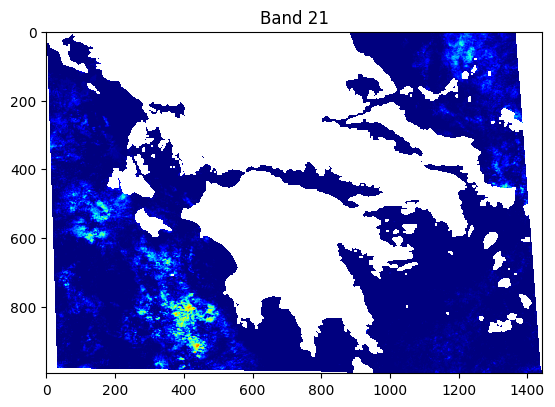

In [29]:
import numpy as np
import matplotlib.pyplot as plt

band_data = np.where(band_data == 0, np.nan, band_data)

# Display the image using matplotlib
plt.figure()
plt.imshow(band_data, cmap='jet')  
plt.title(f"Band {band_num}")
plt.show()

In [30]:
print(np.shape(band_data))

(994, 1443)


In [31]:
print(all_pixel_bands.shape)

(994, 1443, 21)


In [32]:
scale_factors = [1, 0.0139465, 0.0133873, 0.0121481, 0.0115198, 0.0100953, 0.0123538, 0.00879161, 0.00876539, 0.0095103, 0.00773378, 0.00675523, 0.0071996, 0.00749684, 0.0086512, 0.00526779, 0.00530267, 0.00493004, 0.00549962, 0.00502847, 0.00326378, 0.00324118]

for band_num in range(1, num_bands + 1):
    band = dataset.GetRasterBand(band_num)
    band_data = band.ReadAsArray() * scale_factors[band_num]
    all_pixel_bands[:, :, band_num - 1] = band_data

# Reshape the array to have dimensions 27698604x9
reshaped_pixel_bands = all_pixel_bands.reshape(-1, num_bands)

In [15]:
# Create column names
column_names = [f"Oa{band_num+1}_radiance" for band_num in range(1, num_bands + 1)]

# Create a pandas DataFrame with the reshaped data and column names
dff = pd.DataFrame(data=reshaped_pixel_bands, columns=column_names)

print("Shape of DataFrame:", dff.shape)

Shape of DataFrame: (1434342, 21)


In [16]:
#array
np_array=dff.to_numpy()
np.save(r"D:\DLR\greece_jan23_1_10.npy",np_array)

print("Data exported")

Data exported


In [10]:
import numpy as np

# Load the new data as a NumPy array (replace 'new_data.npy' with your file path)
new_data = np.load(r"D:\MTP\DLR\mediterrean_sea\greece\greece_jan23_1_10.npy")
print(new_data[1:,])

[[       nan        nan        nan ...        nan        nan        nan]
 [       nan        nan        nan ...        nan        nan        nan]
 [       nan        nan        nan ...        nan        nan        nan]
 ...
 [0.         0.8969491  0.850367   ... 0.02011388 0.00979134 0.00324118]
 [0.         0.8835618  0.8260708  ... 0.02011388 0.00979134 0.00324118]
 [0.         0.8835618  0.8139227  ... 0.02011388 0.00979134 0.00324118]]


In [12]:
import pandas as pd

In [13]:
columns=['Oa01_radiance', 'Oa02_radiance', 'Oa03_radiance', 'Oa04_radiance', 'Oa05_radiance', 'Oa06_radiance', 'Oa07_radiance', 'Oa08_radiance', 'Oa09_radiance', 'Oa10_radiance', 'Oa11_radiance', 'Oa12_radiance', 'Oa13_radiance', 'Oa14_radiance', 'Oa15_radiance', 'Oa16_radiance', 'Oa17_radiance', 'Oa18_radiance', 'Oa19_radiance', 'Oa20_radiance', 'Oa21_radiance']
dff = pd.DataFrame(new_data, columns=columns)
print(dff.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1434342 entries, 0 to 1434341
Data columns (total 21 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Oa01_radiance  847565 non-null  float64
 1   Oa02_radiance  847565 non-null  float64
 2   Oa03_radiance  847565 non-null  float64
 3   Oa04_radiance  847565 non-null  float64
 4   Oa05_radiance  847565 non-null  float64
 5   Oa06_radiance  847565 non-null  float64
 6   Oa07_radiance  847565 non-null  float64
 7   Oa08_radiance  847565 non-null  float64
 8   Oa09_radiance  847565 non-null  float64
 9   Oa10_radiance  847565 non-null  float64
 10  Oa11_radiance  847565 non-null  float64
 11  Oa12_radiance  847565 non-null  float64
 12  Oa13_radiance  847565 non-null  float64
 13  Oa14_radiance  847565 non-null  float64
 14  Oa15_radiance  847565 non-null  float64
 15  Oa16_radiance  847565 non-null  float64
 16  Oa17_radiance  847565 non-null  float64
 17  Oa18_radiance  847565 non-n

In [17]:
dff[columns] = dff[columns].fillna(0)

In [19]:
X_new=dff[columns]
X_new

,Oa01_radiance,Oa02_radiance,Oa03_radiance,Oa04_radiance,Oa05_radiance,Oa06_radiance,Oa07_radiance,Oa08_radiance,Oa09_radiance,Oa10_radiance,...,Oa12_radiance,Oa13_radiance,Oa14_radiance,Oa15_radiance,Oa16_radiance,Oa17_radiance,Oa18_radiance,Oa19_radiance,Oa20_radiance,Oa21_radiance
0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
1,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
2,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
3,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
4,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1434337,0.0,0.896949,0.838219,0.725747,0.484574,0.506506,0.237373,0.166542,0.142654,0.0,...,0.086395,0.067472,0.025954,0.026339,0.037119,0.03451,0.027498,0.020114,0.009791,0.006482
1434338,0.0,0.923724,0.862515,0.771827,0.524956,0.555921,0.254957,0.166542,0.142654,0.0,...,0.086395,0.074968,0.025954,0.026339,0.042421,0.04437,0.032998,0.025142,0.009791,0.006482
1434339,0.0,0.896949,0.850367,0.737267,0.494670,0.518860,0.246165,0.166542,0.142654,0.0,...,0.079196,0.059975,0.025954,0.021071,0.037119,0.03451,0.027498,0.020114,0.009791,0.003241
1434340,0.0,0.883562,0.826071,0.702708,0.464384,0.481798,0.219790,0.149012,0.133144,0.0,...,0.079196,0.059975,0.025954,0.021071,0.037119,0.03451,0.021998,0.020114,0.009791,0.003241


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

df = pd.read_csv(r"D:\MTP\DLR\mediterrean_sea\data_files\mediterranean_sea_dataset.csv")

features = ['Oa01_radiance', 'Oa02_radiance', 'Oa03_radiance', 'Oa04_radiance', 'Oa05_radiance', 'Oa06_radiance',
            'Oa07_radiance', 'Oa08_radiance', 'Oa09_radiance', 'Oa10_radiance', 'Oa11_radiance', 'Oa12_radiance',
            'Oa13_radiance', 'Oa14_radiance', 'Oa15_radiance', 'Oa16_radiance', 'Oa17_radiance', 'Oa18_radiance',
            'Oa19_radiance', 'Oa20_radiance', 'Oa21_radiance']
X = df[features]
target = 'CPHL'
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf = RandomForestRegressor()
rf.fit(X_train_scaled, y_train.values.ravel())

y_test_pred = rf.predict(X_test_scaled)


rmse_rf = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f'RMSE RF Regression: {rmse_rf}')

y_train_predicted = rf.predict(X_train_scaled)

# absolute errors
rf_errors = np.abs(y_train_predicted - y_train)
error_threshold = 0.1

rf_binary_labels = (rf_errors < error_threshold).astype(int)
print(f'total instances {len(y_train)}')
print(f'good instances {np.sum(rf_binary_labels)}')

# rf_classifier 
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train_scaled, rf_binary_labels)


# Set a custom confidence threshold before making predictions
confidence_threshold = 0.8

# Make predictions and convert probabilities to binary predictions based on the threshold
probabilities = rfc.predict_proba(X_test_scaled)
custom_predictions = (probabilities[:, 1] > confidence_threshold).astype(int)

X_test_good=custom_predictions>0.5

# X_test_good=rfc.predict(X_test_scaled)>0.5

# rf_regressor.fit(X_train[y_train_good], y_train[y_train_good])
y_test_pred_after = rf.predict(X_test_scaled[X_test_good])


rmse_rf_rc = np.sqrt(mean_squared_error(y_test[X_test_good], y_test_pred_after))


print(f'RMSE RF Regression & Classifier: {rmse_rf_rc}')

RMSE RF Regression: 0.09599773139112736
total instances 7768
good instances 7437
RMSE RF Regression & Classifier: 0.08141451393980768


In [20]:
# Make predictions and convert probabilities to binary predictions based on the threshold
X_new_scaled = scaler.transform(X_new)
probabilities = rfc.predict_proba(X_new_scaled)
custom_predictions = (probabilities[:, 1] > confidence_threshold).astype(int)

X_test_good=custom_predictions>0.5

y_new_pred = rf.predict(X_new_scaled[X_test_good])

# rmse_rf_rc = np.sqrt(mean_squared_error(y_test[X_test_good], y_test_pred_after))

Image saved successfully to D:\MTP\DLR\final_paper\greece_map_rfc.pdf


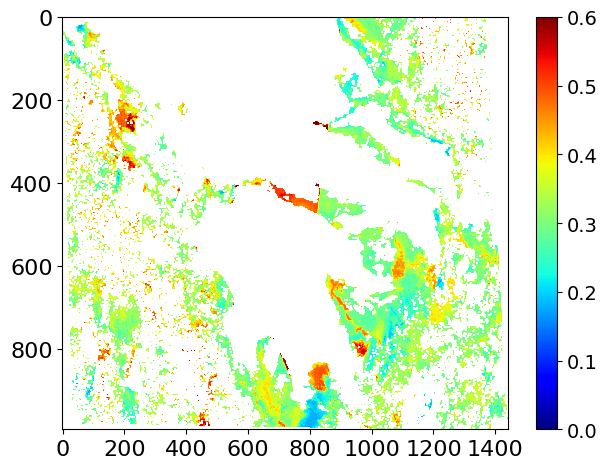

In [41]:
import os
# Assuming height and width are the original dimensions of your TIFF file
original_height = 994
original_width = 1443

# Reshape the predicted values for good pixels
data_good_pixels = np.full((original_height * original_width,), np.nan)

# Assign the predicted values for good pixels to the corresponding locations
data_good_pixels[X_test_good] = y_new_pred

# Reshape the array to the original dimensions
all_predictions = np.reshape(data_good_pixels, (original_height, original_width))

# Update corresponding locations in data with NaN
all_predictions[nan_locations] = np.nan

# Visualize the final predicted map
plt.imshow(all_predictions, aspect="auto", cmap='jet', vmin=0, vmax=0.6)
colorbar=plt.colorbar()#label='Chlorophyll Range')djust the size as needed
colorbar.ax.tick_params(labelsize=14)  # Adjust the size as needed

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

save_directory = r"D:\MTP\DLR\final_paper"
file_name = 'greece_map_rfc.pdf'

# Combine the directory and filename to create the full file path
full_file_path = os.path.join(save_directory, file_name)

# Adjust the layout to ensure all elements fit within the saved image
plt.tight_layout()

# Save the plot as an image with the specified directory
plt.savefig(full_file_path, dpi=600, bbox_inches='tight', pad_inches=0)

# Check if the image file exists
if os.path.exists(full_file_path):
    print(f'Image saved successfully to {full_file_path}')
else:
    print('Image not saved.')

plt.show()

In [45]:
total_pred=rf.predict(X_new_scaled)

In [24]:
print(total_pred.shape)

(1434342,)


In [25]:
print(y_new_pred.shape)

(1362458,)


In [46]:
# data=np.reshape(y_new_pred,(994, 1443))
data=np.reshape(total_pred,(994, 1443))

In [38]:
from osgeo import gdal
import numpy as np


path = r"D:\MTP\DLR\mediterrean_sea\greece\greece_tif.tif"
dataset = gdal.Open(path)

# Get image properties
width = dataset.RasterXSize
height = dataset.RasterYSize
num_bands = dataset.RasterCount

all_pixel_bands = np.zeros((height, width, num_bands))

for band_num in range(1, num_bands + 1):
    band = dataset.GetRasterBand(band_num)
    band_data = band.ReadAsArray() * 0.0001
    all_pixel_bands[:, :, band_num - 1] = band_data

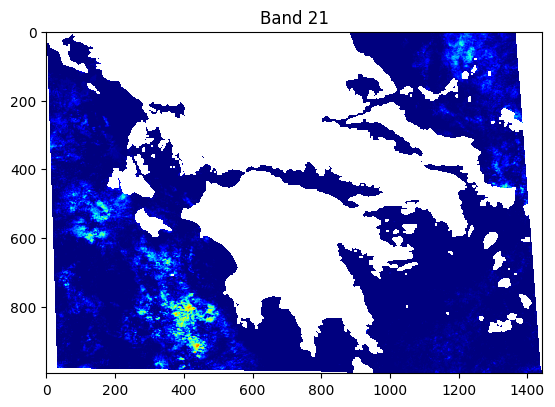

In [39]:
band_data = np.where(band_data == 0, np.nan, band_data)

# Display the image using matplotlib
plt.figure()
plt.imshow(band_data, cmap='jet')  
plt.title(f"Band {band_num}")
plt.show()

In [47]:
# Identify NaN values in band_data
nan_locations = np.isnan(band_data)

# Update corresponding locations in data with NaN
data[nan_locations] = np.nan

Image saved successfully to D:\MTP\DLR\final_paper\greece_map.pdf


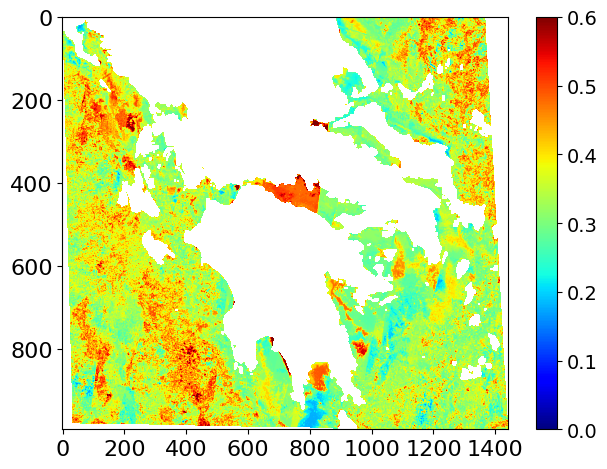

In [48]:
# Visualize the predicted salinity map using matplotlib
import os
plt.imshow(data,aspect="auto", cmap='jet', vmin=0, vmax=0.6)
colorbar=plt.colorbar()#label='Chlorophyll Range')djust the size as needed
colorbar.ax.tick_params(labelsize=14)  # Adjust the size as needed

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

save_directory = r"D:\MTP\DLR\final_paper"
file_name = 'greece_map.pdf'

# Combine the directory and filename to create the full file path
full_file_path = os.path.join(save_directory, file_name)

# Adjust the layout to ensure all elements fit within the saved image
plt.tight_layout()

# Save the plot as an image with the specified directory
plt.savefig(full_file_path, dpi=600, bbox_inches='tight', pad_inches=0)

# Check if the image file exists
if os.path.exists(full_file_path):
    print(f'Image saved successfully to {full_file_path}')
else:
    print('Image not saved.')

# Show the violin plot
plt.show()

In [22]:
# Identify NaN values in band_data
nan_locations = np.isnan(band_data)

# Update corresponding locations in data with NaN
data[nan_locations] = np.nan

NameError: name 'band_data' is not defined

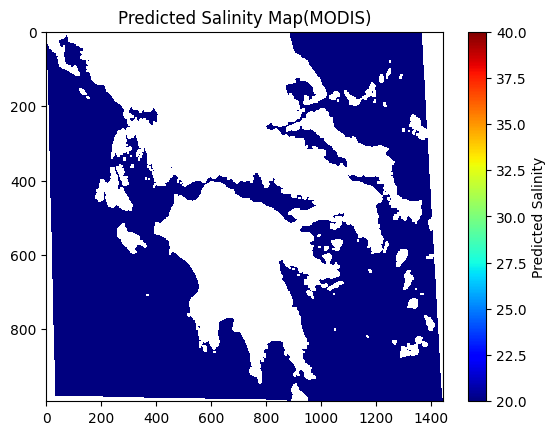

In [32]:
# Visualize the predicted salinity map using matplotlib
plt.imshow(data, aspect='auto', cmap='jet',vmin=20,vmax=40)
plt.colorbar(label='Predicted Salinity')
plt.title('Predicted Salinity Map(MODIS)')

plt.savefig(r"C:\Users\lenovo\OneDrive\Project\Results\predicted_map_modis_20_40.png" )
plt.show()      